In [29]:
!pip install tweepy
!pip install textgenrnn

In [56]:
import tweepy
auth = tweepy.OAuthHandler(conskey, conssec)
auth.set_access_token(acctoken, accsec)
api = tweepy.API(auth)

In [57]:
user = 'pran1214'
item = api.get_user(user)

In [58]:
from datetime import datetime, date, time, timedelta
account_created_date = item.created_at
print(account_created_date)

2015-02-12 01:29:17


In [59]:
from tweepy import OAuthHandler
from tweepy import API
from tweepy import Cursor
statuses = Cursor(api.user_timeline, id=user,tweet_mode='extended',include_rts = False,count=2000).items() 
userwrittentexts = []
for status in statuses:
  text = status.full_text
  userwrittentexts.append(text) 
len(userwrittentexts)

675

In [60]:
import re 
cleanedtweets = []
for x in userwrittentexts: 
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', x)
    if len(text.strip()) == 0: 
      continue 
    else: 
      cleanedtweets.append(text.strip())
print(len(cleanedtweets))

674


In [74]:
from textgenrnn import textgenrnn
textgen = textgenrnn()
trainedmodel = textgen.train_on_texts(cleanedtweets, num_epochs=10,  gen_epochs=10)
textgen.generate_to_file("prantweets.txt", n=100,temperature = .9)

Training on 38,714 character sequences.
Epoch 1/10
302/302 [==============================] - 39s 128ms/step - loss: 2.2856 - lr: 0.0040
Epoch 2/10
302/302 [==============================] - 37s 122ms/step - loss: 1.7487 - lr: 0.0036
Epoch 3/10
302/302 [==============================] - 39s 128ms/step - loss: 1.5269 - lr: 0.0032
Epoch 4/10
302/302 [==============================] - 39s 130ms/step - loss: 1.3839 - lr: 0.0028
Epoch 5/10
302/302 [==============================] - 39s 130ms/step - loss: 1.2679 - lr: 0.0024
Epoch 6/10
302/302 [==============================] - 39s 129ms/step - loss: 1.1690 - lr: 0.0020
Epoch 7/10
302/302 [==============================] - 39s 128ms/step - loss: 1.0847 - lr: 0.0016
Epoch 8/10
302/302 [==============================] - 39s 129ms/step - loss: 0.9997 - lr: 0.0012
Epoch 9/10
302/302 [==============================] - 39s 128ms/step - loss: 0.9393 - lr: 8.0000e-04
Epoch 10/10
302/302 [==============================] - ETA: 0s - loss: 0.8853######

100%|██████████| 100/100 [01:51<00:00,  1.11s/it]


In [21]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pranavraman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pranavraman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
from nltk.tokenize import word_tokenize
tokenized = []
for tweet in cleanedtweets: 
    tokenized_word = word_tokenize(tweet)
    tokenized.extend(tokenized_word)

In [70]:
from nltk.corpus import stopwords
import re
tokenized = [str(x).lower() for x in tokenized]
tokenized = [x for x in tokenized if x != "amp"]
tokenized = [re.sub(r'[^\w\s]','',x) for x in tokenized]
tokenized = [x for x in tokenized if len(x.strip()) > 0]
tokenizednew = []
stop_words=set(stopwords.words("english"))
textabbrev = ['u', 'ur', 'j', 'bc','w','_','-','im','rt','nt','get','got']
for x in tokenized: 
    if x not in stop_words and x not in textabbrev: 
        tokenizednew.append(x)
tokenized = tokenizednew

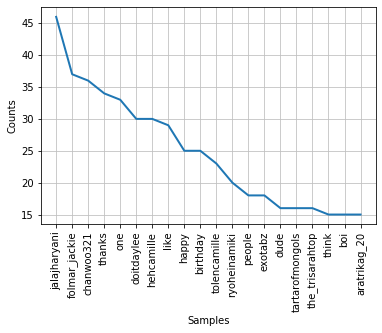

In [71]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized)
import matplotlib.pyplot as plt
fdist.plot(20,cumulative=False)
plt.show()

In [72]:
fdist.most_common(20)

[('jalajharyani', 46),
 ('folmar_jackie', 37),
 ('chanwoo321', 36),
 ('thanks', 34),
 ('one', 33),
 ('doitdaylee', 30),
 ('hehcamille', 30),
 ('like', 29),
 ('happy', 25),
 ('birthday', 25),
 ('tolencamille', 23),
 ('ryoheinamiki', 20),
 ('people', 18),
 ('exotabz', 18),
 ('dude', 16),
 ('tartarofmongols', 16),
 ('the_trisarahtop', 16),
 ('think', 15),
 ('boi', 15),
 ('aratrikag_20', 15)]

In [55]:
len(cleanedtweets)

727